**Group Members**\
        **Cherukuri Nikhilesh - S20180010040**\
        **Kore Nithish Kumar - S20180010086**\
        **Pulla Nagendra Babu - S20180010138**\
        **Rishab Tripati - S20180010147**

In [8]:
!pip install xlrd


You should consider upgrading via the 'c:\users\nikhi\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import statistics
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold ,RepeatedKFold,train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import shapiro,pearsonr
from scipy import stats
import scipy as sp
from sklearn.metrics import r2_score
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
from sklearn import preprocessing,metrics,datasets, linear_model,svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import linear_model,tree

In [6]:
!pip install factor_analyzer==0.2.3

You should consider upgrading via the 'c:\users\nikhi\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [9]:
sheets=pd.read_excel('stock_portfolio.xlsx',sheet_name=['all period'],skiprows=[0], usecols = [1,2,3,4,5,6,13,14,15,16,17,18])
df=pd.concat(sheets[frame] for frame in sheets.keys())
df.keys()
df.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.580151,0.576170,0.426494,0.391749,0.566984,0.547899
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.133358,0.137047,0.118178,0.136653,0.112803,0.159468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525811,0.519093,0.358600,0.297324,0.520000,0.411765
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.598516,0.587148,0.403418,0.368958,0.560000,0.552941
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.679636,0.669294,0.470571,0.457749,0.640000,0.694118
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [10]:
df.isnull().values.any()

False

In [11]:
df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


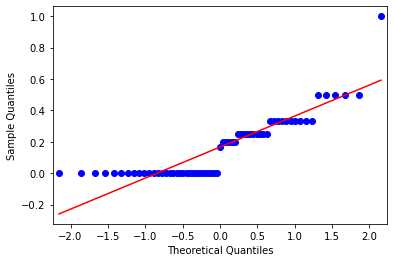

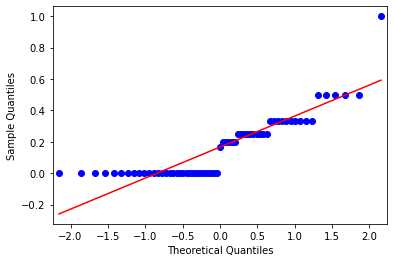

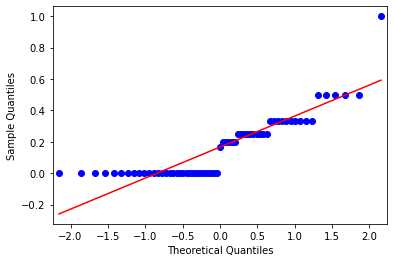

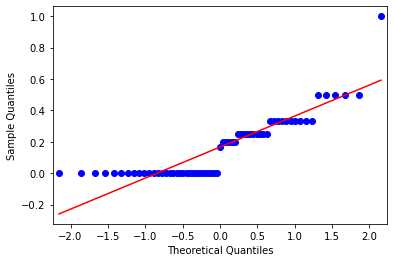

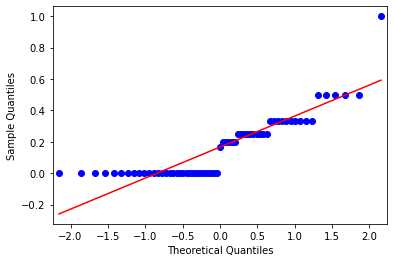

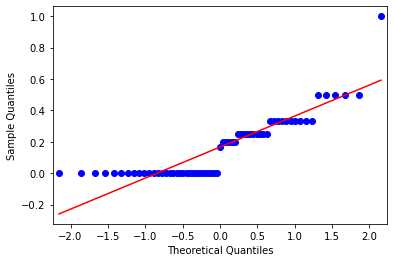

In [12]:
X= df.drop(['Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'],axis=1)
Y = df.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)
for each in X.keys():
    qqplot(X[each],line='s')
    plt.show()

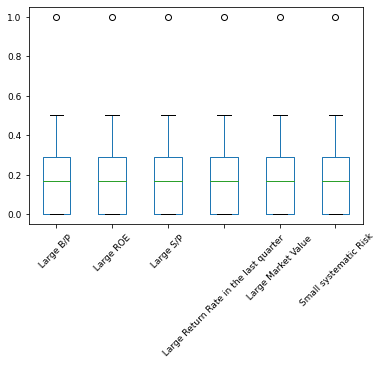

In [13]:
boxplot = X.boxplot(grid=False,rot=45, fontsize=9)

In [14]:
df.shape

(63, 12)

In [15]:
z = np.abs(stats.zscore(df))
df_o = df[(z < 3).all(axis=1)]
print(df_o.shape)

(57, 12)


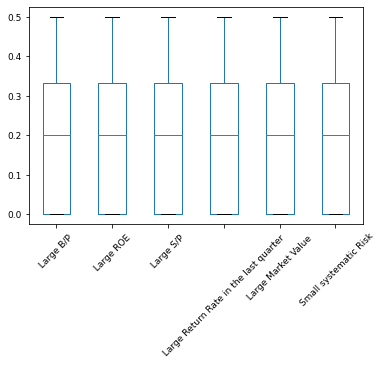

In [17]:
X= df_o.drop(['Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'],axis=1)
Y = df_o.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)
boxplot = X.boxplot(grid=False,rot=45, fontsize=9)

In [18]:
correlation=df_o.corr()
print(correlation)

                                          Large B/P    Large ROE   \
 Large B/P                                  1.000000    -0.200000   
 Large ROE                                 -0.200000     1.000000   
 Large S/P                                 -0.200000    -0.200000   
 Large Return Rate in the last quarter     -0.200000    -0.200000   
 Large Market Value                        -0.200000    -0.200000   
 Small systematic Risk                     -0.200000    -0.200000   
Annual Return.1                             0.212125     0.472679   
Excess Return.1                             0.255376     0.453642   
Systematic Risk.1                          -0.055462    -0.248139   
Total Risk.1                                0.240293    -0.346928   
Abs. Win Rate.1                             0.419245     0.317428   
Rel. Win Rate.1                            -0.127445     0.738607   

                                          Large S/P   \
 Large B/P                                 -0.

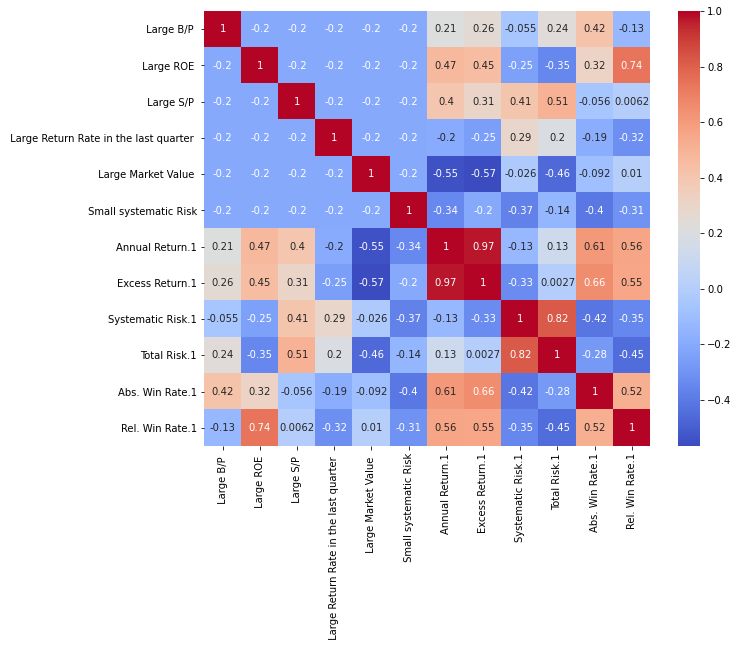

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [20]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(X)
variance = pd.DataFrame(pca.explained_variance_ratio_)
print(variance)
cumulative=np.cumsum(pca.explained_variance_ratio_)
print(cumulative)

              0
0  1.999999e-01
1  1.999999e-01
2  1.999999e-01
3  1.999999e-01
4  1.999999e-01
5  3.122362e-07
[0.19999994 0.39999988 0.59999981 0.79999975 0.99999969 1.        ]


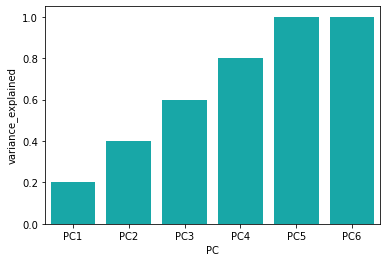

In [21]:
df3 = pd.DataFrame({'variance_explained':cumulative,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="variance_explained", data=df3, color="c");

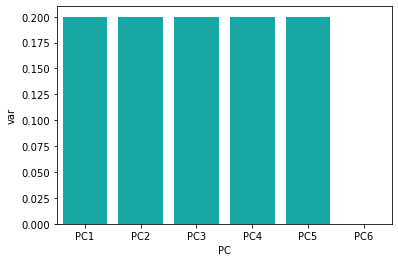

In [22]:
df2 = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="var", data=df2, color="c");

In [23]:
components=pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])
components.head(6)

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
PC-1,-0.000000,-0.321502,-0.436450,0.792111,0.180561,-0.214721
PC-2,0.912871,-0.182574,-0.182574,-0.182574,-0.182574,-0.182574
PC-3,0.000000,0.816724,-0.332728,0.147285,-0.341164,-0.290117
PC-4,-0.000000,-0.014635,-0.547021,-0.040491,-0.207662,0.809809
PC-5,-0.000000,0.171418,-0.446734,-0.386299,0.779667,-0.118052
PC-6,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=1)



model for Annual Return.1 evaluation parameter
The linear model is: Y = -12.438 + 13.148*large b/p + 13.355*large ROE + 13.286*large s/p+ 12.912*large return rates+ 12.719*large market sales+ 12.817*small system risk
Variance score: 0.7019488999882225


model for Excess Return.1 evaluation parameter
The linear model is: Y = -16.664 + 17.401*large b/p + 17.568*large ROE + 17.455*large s/p+ 17.114*large return rates+ 16.927*large market sales+ 17.128*small system risk
Variance score: 0.6717835969280775


model for Systematic Risk.1 evaluation parameter
The linear model is: Y = 14.279 + -13.893*large b/p + -13.983*large ROE + -13.669*large s/p+ -13.757*large return rates+ -13.875*large market sales+ -14.056*small system risk
Variance score: 0.08145662584082303


model for Total Risk.1 evaluation parameter
The linear model is: Y = 7.0886 + -6.5722*large b/p + -6.8841*large ROE + -6.431*large s/p+ -6.6196*large return rates+ -6.9572*large market sales+ -6.8111*small system risk
Variance s

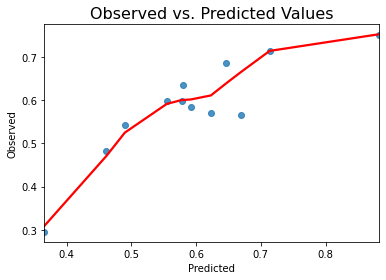

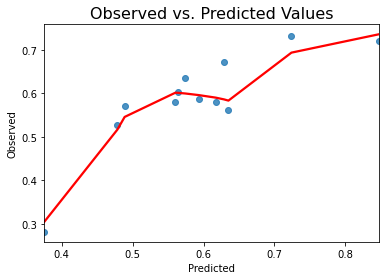

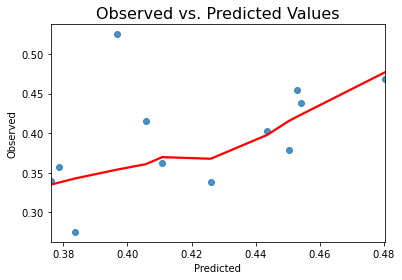

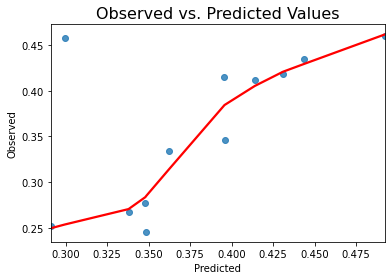

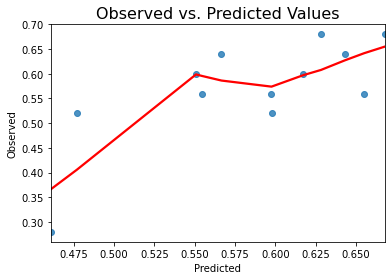

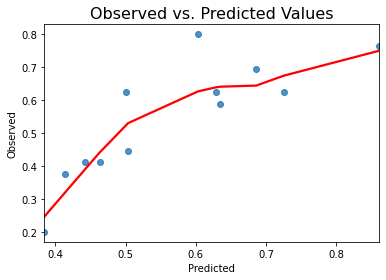

In [25]:
targets=pd.DataFrame(columns=['Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'],index=y_test.index.values) 
for y in targets.keys():
    reg = linear_model.LinearRegression() 
    reg.fit(x_train, y_train[y])
    print("\n")
    print("model for",y,'evaluation parameter')
    print("The linear model is: Y = {:.5} + {:.5}*large b/p + {:.5}*large ROE + {:.5}*large s/p+ {:.5}*large return rates+ {:.5}*large market sales+ {:.5}*small system risk".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2],reg.coef_[3],reg.coef_[4],reg.coef_[5]))
    print('Variance score: {}'.format(reg.score(x_test, y_test[y]))) 
    y_pred = reg.predict(x_test)
    targets[y]= y_pred          
    fig, ax = plt.subplots(1,1)
    sns.regplot(x=y_pred, y=y_test[y], lowess=True, ax=ax, line_kws={'color': 'red'})
    ax.set_title('Observed vs. Predicted Values', fontsize=16)
    ax.set(xlabel='Predicted', ylabel='Observed')


In [27]:
for y in targets.keys():
    model_ols = sm.OLS(y_train[y],x_train).fit()
    print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:        Annual Return.1   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              644.1
Date:                Sun, 06 Dec 2020   Prob (F-statistic):                    2.13e-37
Time:                        12:31:53   Log-Likelihood:                          62.057
No. Observations:                  45   AIC:                                     -112.1
Df Residuals:                      39   BIC:                                     -101.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------

c:\users\nikhi\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


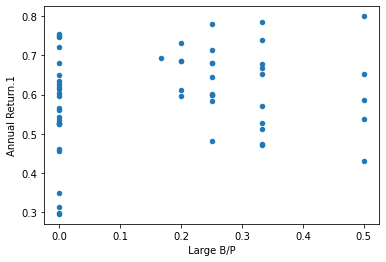

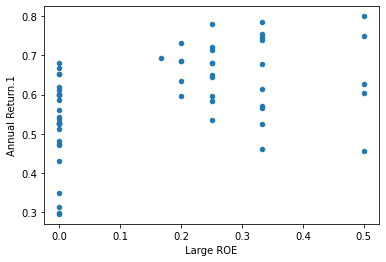

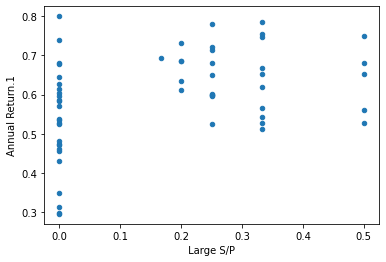

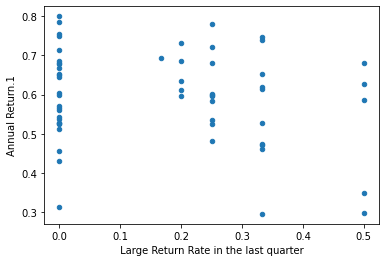

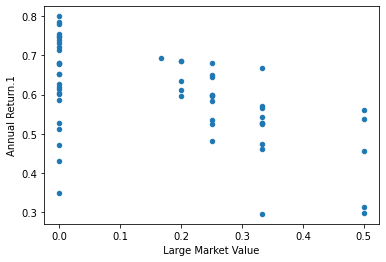

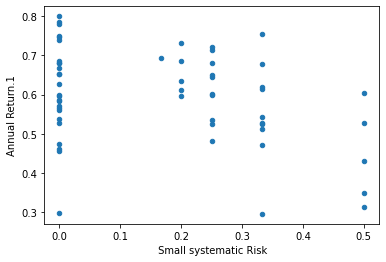

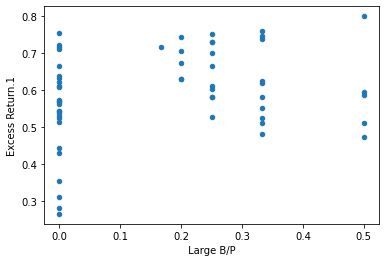

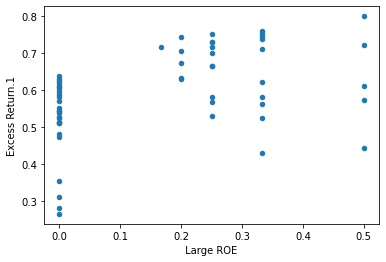

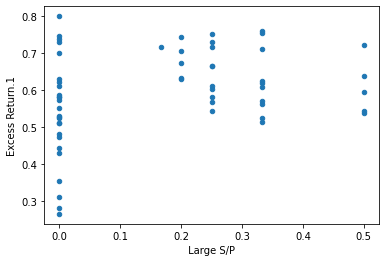

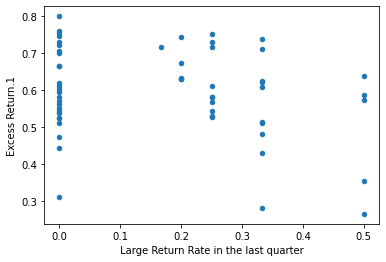

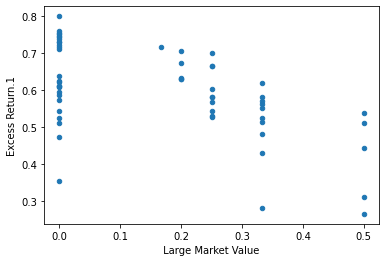

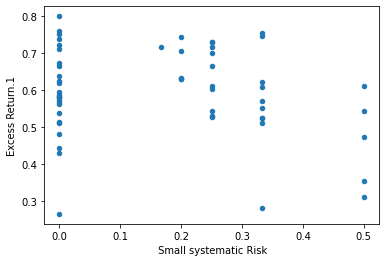

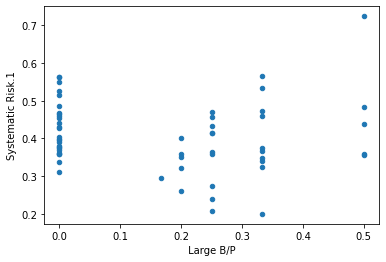

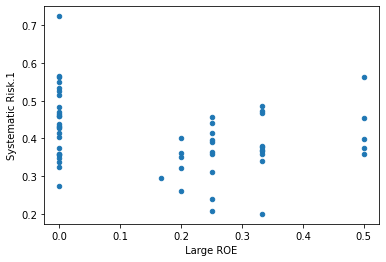

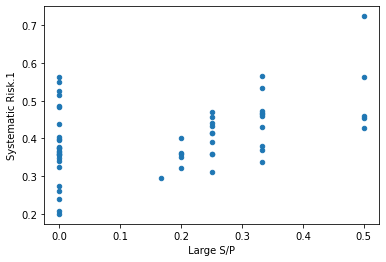

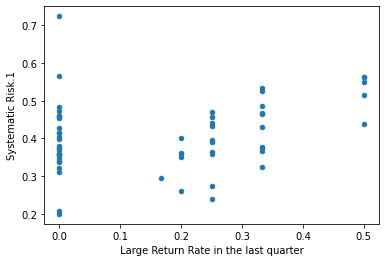

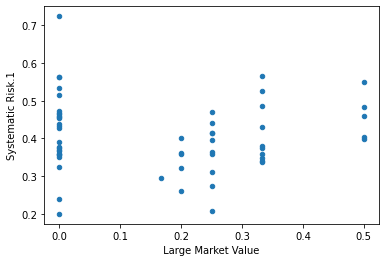

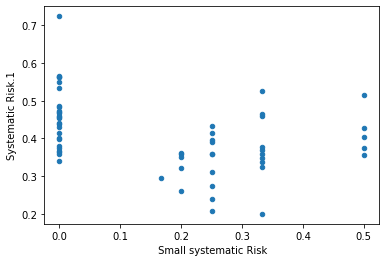

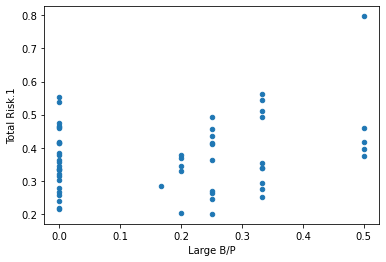

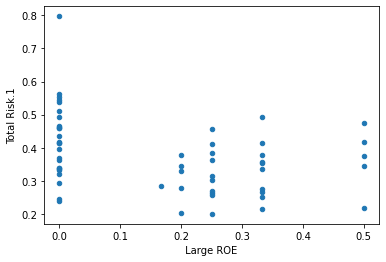

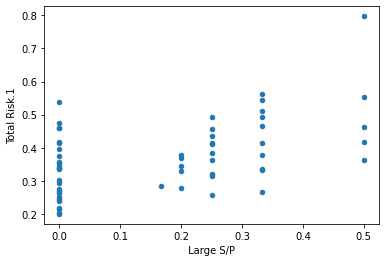

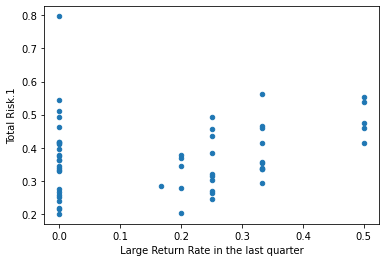

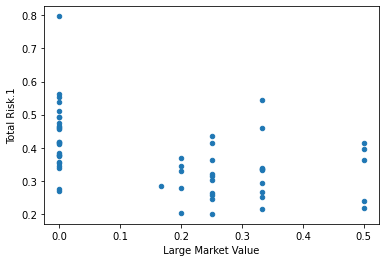

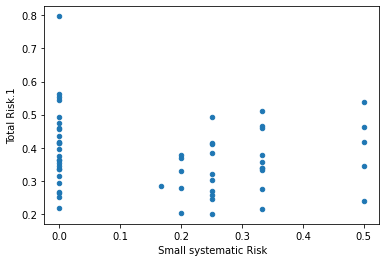

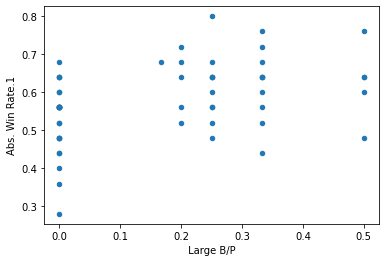

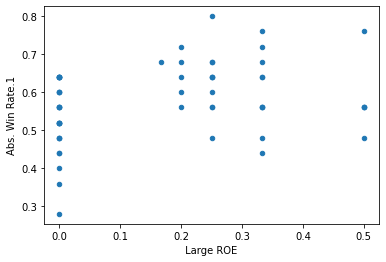

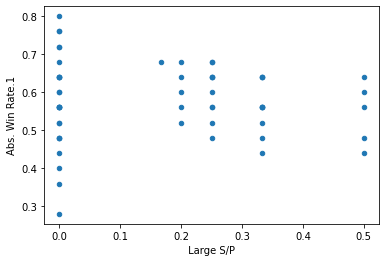

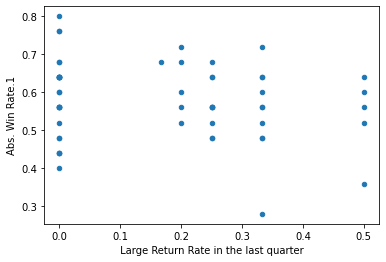

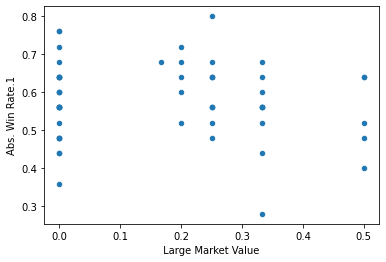

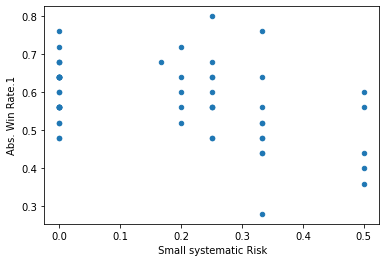

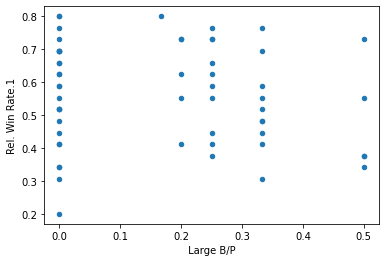

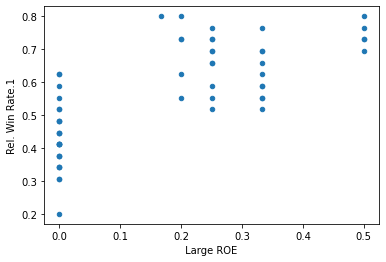

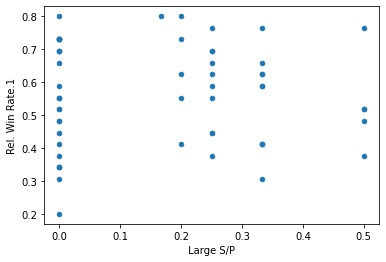

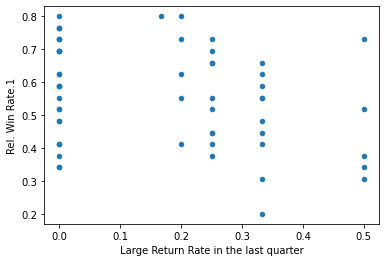

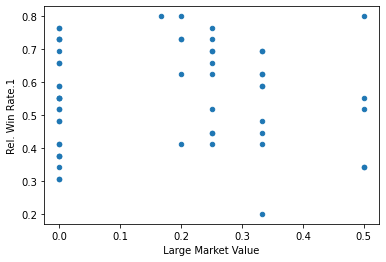

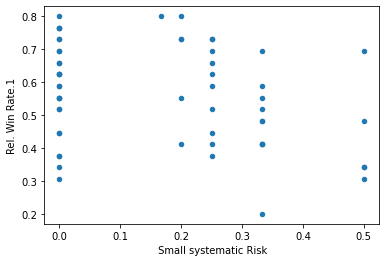

In [28]:
for y in targets.keys():
    for x in X.keys():
        colors = (0,0,0)
        area = np.pi*3
        df_o.plot.scatter(x=x, y=y)

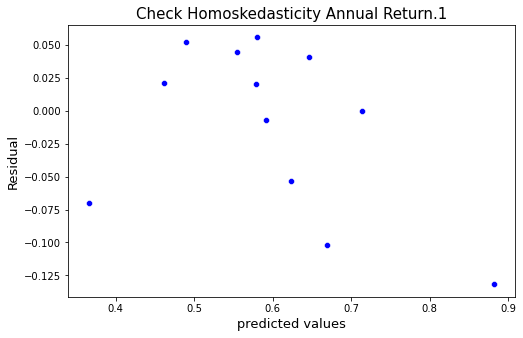

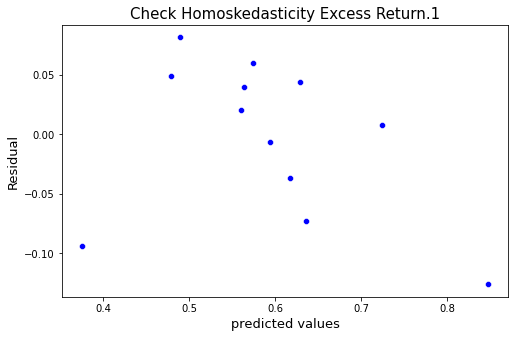

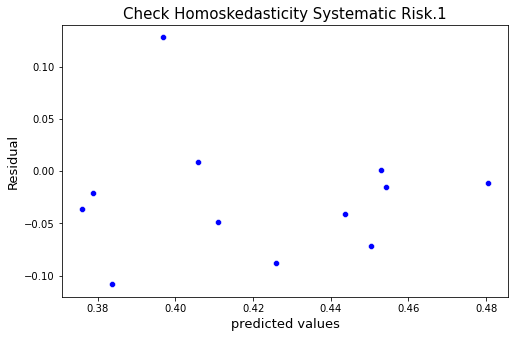

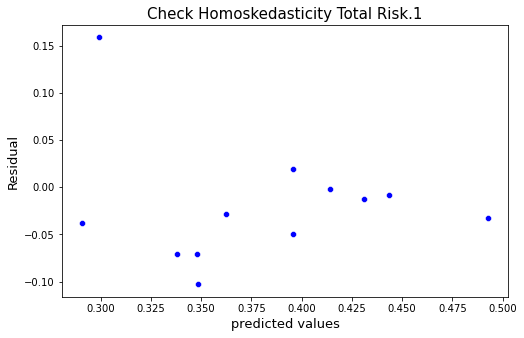

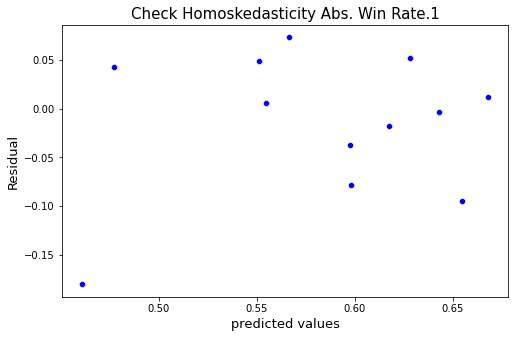

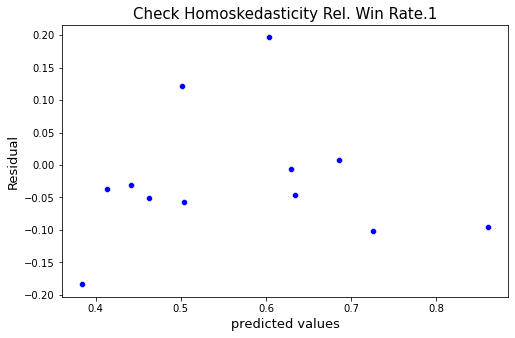

In [29]:
error_list=[]
for y in targets.keys():
    error = y_test[y] - targets[y]
    error_info = pd.DataFrame({'y_true': y_test[y], 'y_pred': targets[y], 'error': error}, columns=['y_true', 'y_pred', 'error'])
    error_list.append(error_info)
    plt.figure(figsize=(8,5))
    g = sns.scatterplot(x="y_pred", y="error", data=error_info, color='blue')
    g.set_title(f'Check Homoskedasticity {y}', fontsize=15)
    g.set_xlabel("predicted values", fontsize=13)
    g.set_ylabel("Residual", fontsize=13)

1.6215799780769389
1.6819424442764461
1.1953060659793078
1.2152153735475444
2.2147484787942946
2.1946702508706006


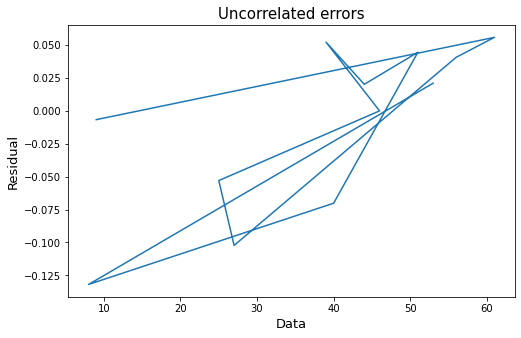

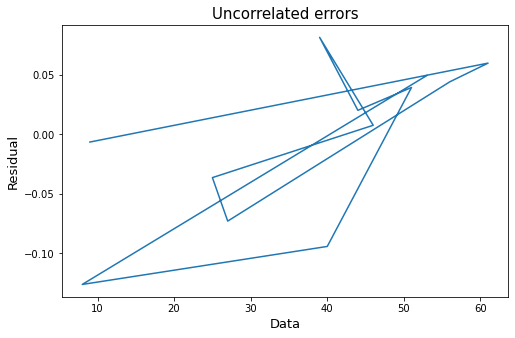

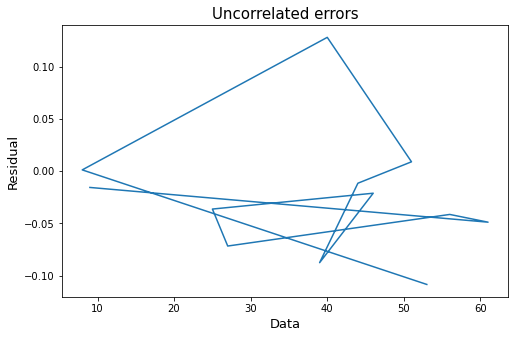

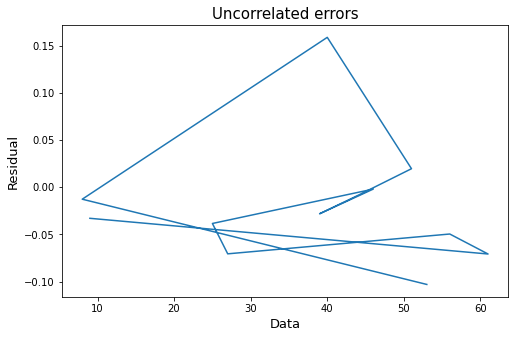

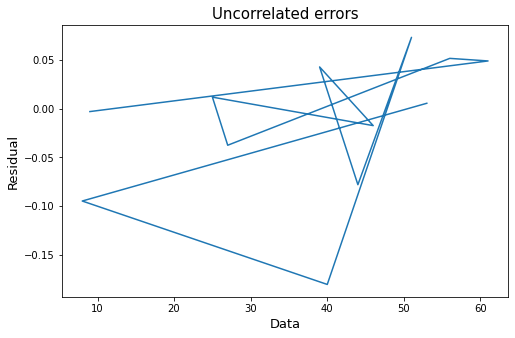

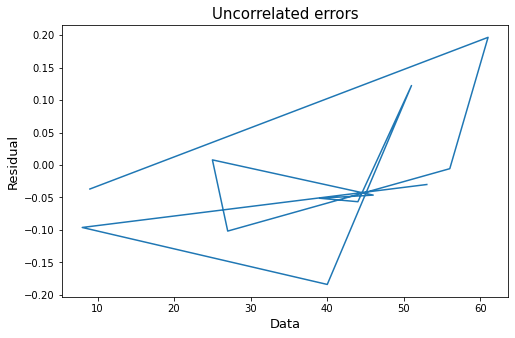

In [30]:
for error in error_list: 
      fig, ax = plt.subplots(figsize=(8,5))
      ax = error.error.plot()
      dw=durbin_watson(error.error,axis=0)
      print(dw)
      ax.set_title('Uncorrelated errors', fontsize=15)
      ax.set_xlabel("Data", fontsize=13)
      ax.set_ylabel("Residual", fontsize=13)

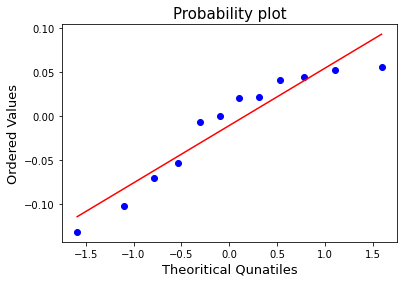

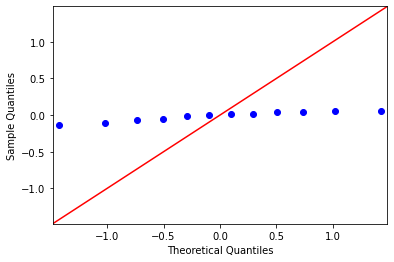

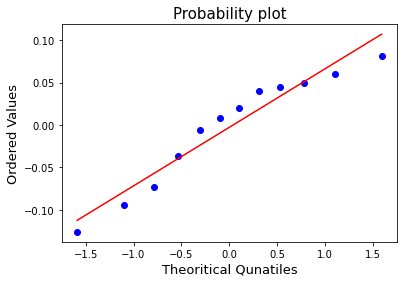

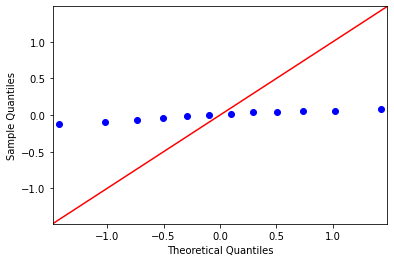

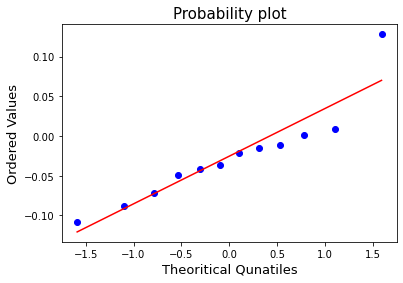

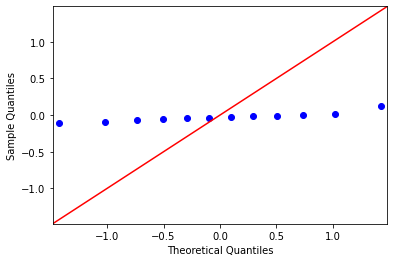

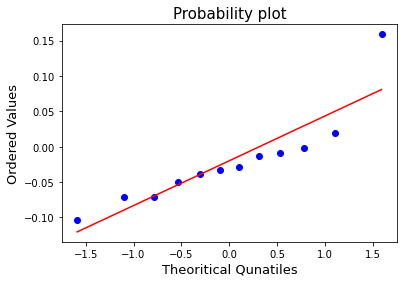

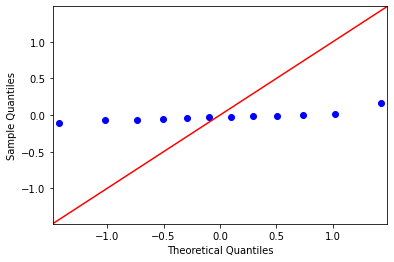

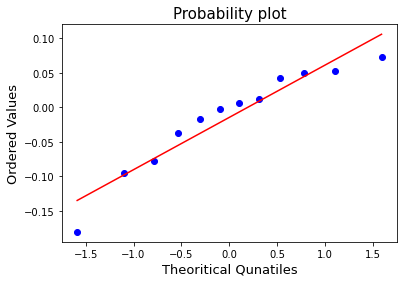

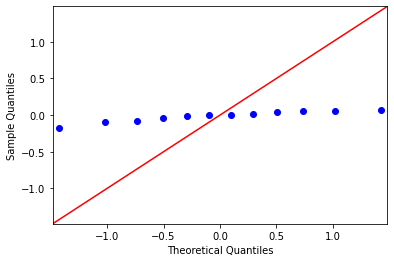

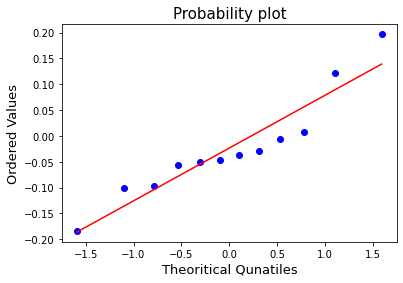

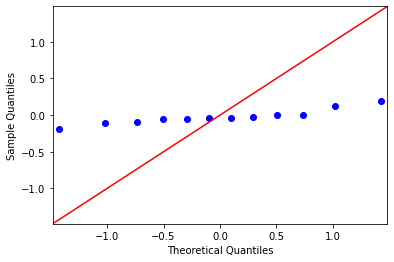

In [31]:
for error in error_list:
    fig, ax = plt.subplots(figsize=(6,4))
    _ = sp.stats.probplot(error.error, plot=ax, fit=True)
    ax.set_title('Probability plot', fontsize=15)
    ax.set_xlabel("Theoritical Qunatiles", fontsize=13)
    ax.set_ylabel("Ordered Values", fontsize=13)
    ax = sm.qqplot(error.error, line='45')
    plt.show()

In [32]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [statistics.mean(ys_orig) for y in ys_orig]
    squared_error_regr = mean_squared_error(ys_orig, ys_line)
    squared_error_y_mean = mean_squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def mean_squared_error(y_true,y_pred):
    return  metrics.mean_squared_error(y_true, y_pred)
def goodness(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)

In [33]:
for y in targets.keys():
    r_squared = coefficient_of_determination(y_test[y],targets[y])
    print(r_squared)

0.7019488999882225
0.6717835969280775
0.08145662584082303
0.30663192303227294
0.5045284905612033
0.6624426054758403


In [34]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

(652.6814476921419, 1.0907491324077153e-129)

In [35]:
from factor_analyzer import FactorAnalyzer

In [36]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(X,6, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev 

,Original_Eigenvalues
0,1.200000
1,1.200000
2,1.200000
3,1.200000
4,1.200000
5,0.000002


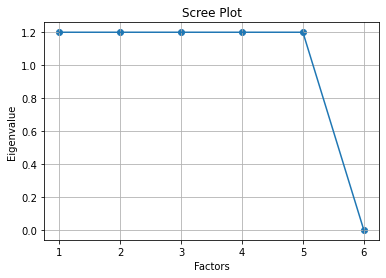

In [37]:
# Create scree plot using matplotlib
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [38]:
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Large B/P,0.000000,-0.997914,0.000000,0.000000e+00,0.000000,0.0
Large ROE,0.039371,0.199583,-0.975935,1.756413e-16,0.044720,0.0
Large S/P,-0.574641,0.199583,0.191801,-4.036762e-01,-0.652721,0.0
Large Return Rate in the last quarter,0.429445,0.199583,0.284570,-6.727937e-01,0.487796,0.0
Large Market Value,0.633092,0.199583,0.249782,5.382350e-01,-0.450674,0.0
Small systematic Risk,-0.527266,0.199583,0.249782,5.382350e-01,0.570878,0.0


In [39]:
# Get variance of each factors
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,1.195000,1.195000,1.195000,1.195000,1.195000,0.000000
Proportion Var,0.199167,0.199167,0.199167,0.199167,0.199167,0.000000
Cumulative Var,0.199167,0.398333,0.597500,0.796666,0.995833,0.995833
